In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.chdir("C:/Users/pz413sz/Documents/test_workflows")
data_path = "datasets/HistoricalQuotes.csv"

In [3]:
stock_data = pd.read_csv(data_path)

In [ ]:
stock_data.head()

In [7]:
stock_data.drop([0], axis = 0, inplace = True)

In [8]:
stock_data.head()

,date,close,volume,open,high,low
1,2019/06/24,1115.5200,1395696.0000,1119.6100,1122.0000,1111.0100
2,2019/06/21,1121.8800,1947591.0000,1109.2400,1124.1100,1108.0800
3,2019/06/20,1111.4200,1262011.0000,1119.9900,1120.1200,1104.7400
4,2019/06/19,1102.3300,1339218.0000,1105.6000,1107.0000,1093.4800
5,2019/06/18,1103.6000,1386684.0000,1109.6900,1116.3900,1098.9900


In [9]:
stock_data.describe()

,date,close,volume,open,high,low
count,1007,1007,1007,1007,1007,1007
unique,1007,995,1006,983,993,992
top,2019/02/08,831.4100,2225495.0000,980.0000,1200.0000,1073.5000
freq,1,2,2,3,3,2


In [10]:
for i in list(stock_data.columns):
    if i != "date":
        stock_data[i] = stock_data[i].astype('float', copy=True)
    else:
        stock_data[i] = pd.to_datetime(stock_data[i])

In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 1 to 1007
Data columns (total 6 columns):
date      1007 non-null datetime64[ns]
close     1007 non-null float64
volume    1007 non-null float64
open      1007 non-null float64
high      1007 non-null float64
low       1007 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 55.1 KB


In [12]:
stock_data.head()

,date,close,volume,open,high,low
1,2019-06-24,1115.52,1395696.0,1119.61,1122.00,1111.01
2,2019-06-21,1121.88,1947591.0,1109.24,1124.11,1108.08
3,2019-06-20,1111.42,1262011.0,1119.99,1120.12,1104.74
4,2019-06-19,1102.33,1339218.0,1105.60,1107.00,1093.48
5,2019-06-18,1103.60,1386684.0,1109.69,1116.39,1098.99


In [13]:
stock_data["average"] = (stock_data["high"] + stock_data["low"])/2

In [14]:
stock_data.head()

,date,close,volume,open,high,low,average
1,2019-06-24,1115.52,1395696.0,1119.61,1122.00,1111.01,1116.505
2,2019-06-21,1121.88,1947591.0,1109.24,1124.11,1108.08,1116.095
3,2019-06-20,1111.42,1262011.0,1119.99,1120.12,1104.74,1112.430
4,2019-06-19,1102.33,1339218.0,1105.60,1107.00,1093.48,1100.240
5,2019-06-18,1103.60,1386684.0,1109.69,1116.39,1098.99,1107.690


In [15]:
vol_avg = ["volume", "average"]

In [16]:
#input_feature= stock_data.iloc[:,[2,6]].values
#input_data = input_feature

In [17]:
input_feature = stock_data[vol_avg]

In [18]:
input_data = np.array(input_feature)

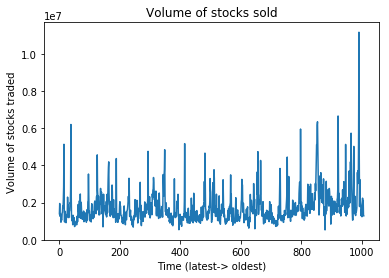

In [19]:
plt.plot(input_data[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

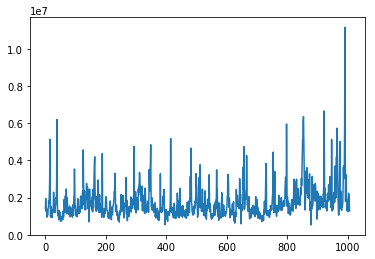

In [20]:
plt.plot(input_feature["volume"])

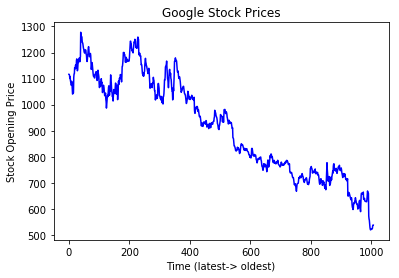

In [21]:
plt.plot(input_data[:,1], color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_data[:,:])

# Go back  50 business days

In [23]:
len(stock_data)

1007

In [24]:
lookback = 50

test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1-2):
#    print(i)
#    print("break")
    t=[]
    for j in range(0,lookback):
#        print(j)
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[(i+ lookback):(i+ lookback+2),1])
    
#    print((i+j),(i+lookback))
    

In [25]:
len(X), len(stock_data), len(y)

(954, 1007, 954)

In [26]:
X = np.array(X)

In [27]:
y = np.array(y)

In [28]:
test_size

302

In [29]:
lookback

50

In [30]:
X_test = X[-(test_size+lookback):]
y_test =  y[-(test_size+lookback):]

In [31]:
X_train = X[:-(test_size+lookback)]

In [32]:
y_train =  y[:-(test_size+lookback)]

In [33]:
X_train.shape

(602, 50, 1, 2)

In [34]:
y_train.shape

(602, 2)

In [35]:
X_train = X_train.reshape(X_train.shape[0],lookback, 2)

In [36]:
X_test = X_test.reshape(X_test.shape[0],lookback, 2)

In [37]:
X_train.shape

(602, 50, 2)

In [38]:
X_test.shape

(352, 50, 2)

In [39]:
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [40]:
model = Sequential()
model.add(LSTM(units=20, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=20, return_sequences=True))
model.add(LSTM(units=20))
model.add(Dense(units=2))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 20)            1840      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 42        
Total params: 8,442
Trainable params: 8,442
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
602/602 [==============================] - 5s 9ms/step - loss: 0.2485
Epoch 2/200
602/602 [==============================] - 4s 7ms/step - loss: 0.0288
Epoch 3/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0121
Epoch 4/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0077
Epoch 5/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0043
Epoch 6/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0027
Epoch 7/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0023
Epoch 8/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0022
Epoch 9/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0022
Epoch 10/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0021
Epoch 11/200
602/602 [==============================] - 5s 8ms/step - loss: 0.0020
Epoch 12/200
602/602 [==========================

Epoch 191/200
602/602 [==============================] - 5s 8ms/step - loss: 5.8131e-04
Epoch 192/200
602/602 [==============================] - 5s 8ms/step - loss: 6.6247e-04
Epoch 193/200
602/602 [==============================] - 5s 8ms/step - loss: 5.9956e-04
Epoch 194/200
602/602 [==============================] - 5s 8ms/step - loss: 5.7234e-04
Epoch 195/200
602/602 [==============================] - 5s 8ms/step - loss: 6.1549e-04
Epoch 196/200
602/602 [==============================] - 5s 8ms/step - loss: 5.8107e-04
Epoch 197/200
602/602 [==============================] - 5s 8ms/step - loss: 5.3654e-04
Epoch 198/200
602/602 [==============================] - 5s 8ms/step - loss: 5.2008e-04
Epoch 199/200
602/602 [==============================] - 5s 8ms/step - loss: 5.3628e-04
Epoch 200/200
602/602 [==============================] - 5s 8ms/step - loss: 5.4706e-04


In [43]:
y_pred= model.predict(X_test)

In [44]:
y_pred

array([[0.32789326, 0.32398233],
       [0.32489327, 0.3201815 ],
       [0.3239089 , 0.3192954 ],
       [0.32430542, 0.32088554],
       [0.32253784, 0.32040054],
       [0.33579177, 0.33751756],
       [0.3442574 , 0.34843892],
       [0.3451408 , 0.34981796],
       [0.3428043 , 0.34701192],
       [0.33758652, 0.34092724],
       [0.33308604, 0.33572003],
       [0.3326965 , 0.3350573 ],
       [0.33940923, 0.34215748],
       [0.34957945, 0.35262936],
       [0.37178695, 0.37652978],
       [0.38002136, 0.38432044],
       [0.37588608, 0.37835956],
       [0.37242964, 0.37358862],
       [0.3717053 , 0.37212133],
       [0.3658968 , 0.3649857 ],
       [0.3636065 , 0.3620885 ],
       [0.36377022, 0.36201906],
       [0.36369973, 0.36180514],
       [0.3545127 , 0.35140586],
       [0.3435231 , 0.33928037],
       [0.33792108, 0.33351552],
       [0.33667755, 0.33239424],
       [0.34005564, 0.33610892],
       [0.34208345, 0.33785754],
       [0.3397287 , 0.33451033],
       [0.

In [45]:
y_test

array([[0.31517071, 0.31155515],
       [0.31155515, 0.29441541],
       [0.29441541, 0.31140601],
       [0.31140601, 0.33262942],
       [0.33262942, 0.34551677],
       [0.34551677, 0.35403943],
       [0.35403943, 0.342117  ],
       [0.342117  , 0.31784167],
       [0.31784167, 0.32315504],
       [0.32315504, 0.33378297],
       [0.33378297, 0.34692342],
       [0.34692342, 0.35736041],
       [0.35736041, 0.37596634],
       [0.37596634, 0.36667656],
       [0.36667656, 0.37215548],
       [0.37215548, 0.38436604],
       [0.38436604, 0.38316608],
       [0.38316608, 0.36569418],
       [0.36569418, 0.36997974],
       [0.36997974, 0.37147309],
       [0.37147309, 0.361524  ],
       [0.361524  , 0.34581577],
       [0.34581577, 0.34357409],
       [0.34357409, 0.3397962 ],
       [0.3397962 , 0.35032549],
       [0.35032549, 0.35208587],
       [0.35208587, 0.34706847],
       [0.34706847, 0.3372842 ],
       [0.3372842 , 0.34098297],
       [0.34098297, 0.34210381],
       [0.

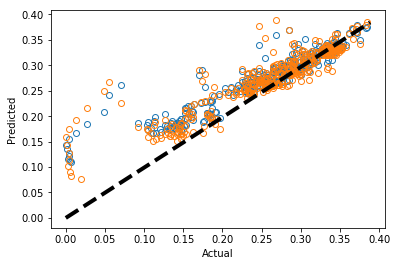

In [46]:
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, 'o', mfc = 'none')
ax.plot([y_test.min(), y_pred.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()